In [1]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

## Kernel Composition

**Note**: Normalization of time range effects the period length hyperparams.
 - Solution? Normalize the range of period constraints

### 30T

In [26]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.075, 0.101) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.193, 0.22) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic  + local_variation

In [27]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('og_3_1H', 60, True)

Iter 1 , Loss = 1.5560581778082259 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.5274084878535883 , Noise = 0.6444966793060303
Iter 3 , Loss = 1.5008875450966948 , Noise = 0.59827721118927
Iter 4 , Loss = 1.4768180353175289 , Noise = 0.5546234250068665
Iter 5 , Loss = 1.4555127785465567 , Noise = 0.5135840177536011
Iter 6 , Loss = 1.4372540774087577 , Noise = 0.47522851824760437
Iter 7 , Loss = 1.4222640104824948 , Noise = 0.4396551847457886
Iter 8 , Loss = 1.4106606952868181 , Noise = 0.40700021386146545
Iter 9 , Loss = 1.4023942481371197 , Noise = 0.37744444608688354
Iter 10 , Loss = 1.3971606211342742 , Noise = 0.3512108325958252
Iter 11 , Loss = 1.3943135571804206 , Noise = 0.32853901386260986
Iter 12 , Loss = 1.3928452947278327 , Noise = 0.30962538719177246
Iter 13 , Loss = 1.3915421147059976 , Noise = 0.2945351302623749
Iter 14 , Loss = 1.3893256987119404 , Noise = 0.28312984108924866
Iter 15 , Loss = 1.385583397751837 , Noise = 0.2750624120235443
Iter 16 , Loss = 1.380261321936

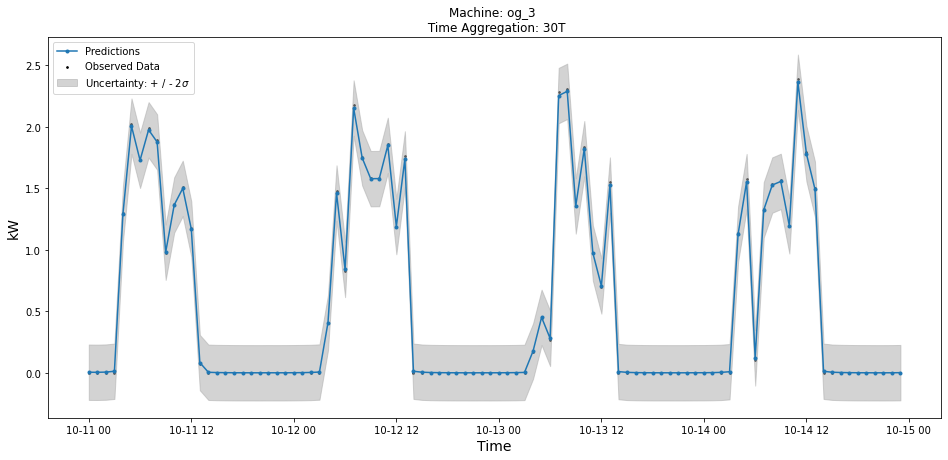

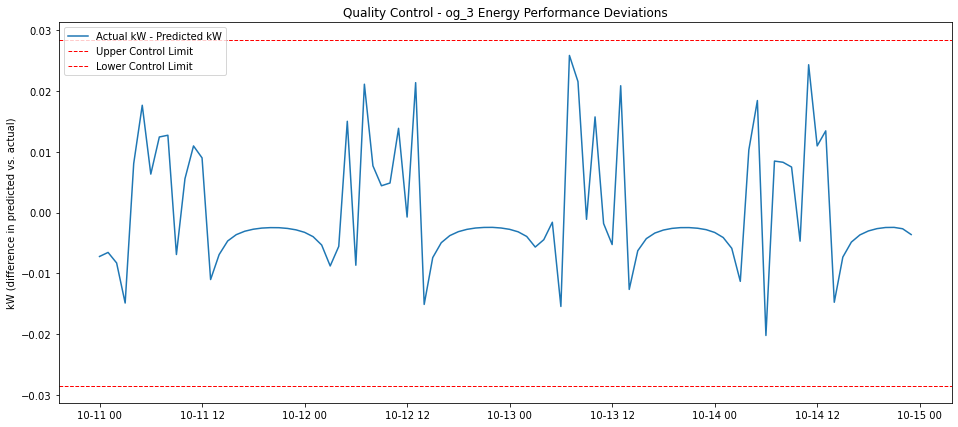

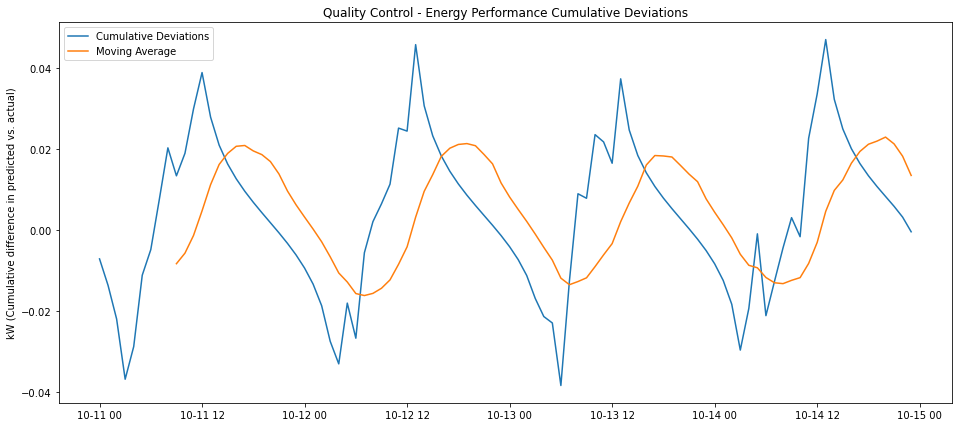

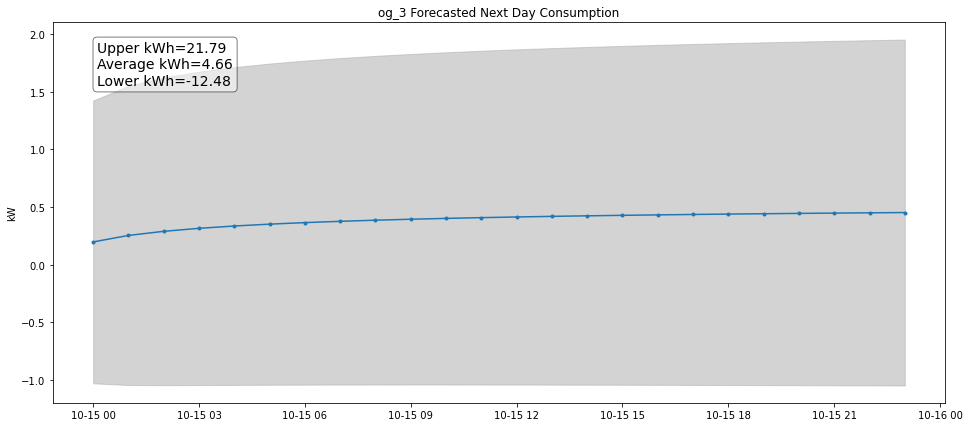

In [28]:
func_preds_mean_inv, func_preds_var_inv, observed_preds, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    training_iter=100,
    lr=0.1,
    time_agg='30T',
    machine='og_3',
    update_score=False
)   

In [11]:
mse, mape

(0.79429443555255, 1776.8934689815596)